# Categorical encoders

Examples of how to use the different categorical encoders using the Titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine import categorical_encoders as ce
from feature_engine.missing_data_imputers import CategoricalVariableImputer

pd.set_option('display.max_columns', None)

In [2]:
# Load titanic dataset from OpenML

def load_titanic():
    data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['age'] = data['age'].astype('float')
    data['fare'] = data['fare'].astype('float')
    data['embarked'].fillna('C', inplace=True)
    data.drop(labels=['boat', 'body', 'home.dest'], axis=1, inplace=True)
    return data

In [3]:
# load data
data = load_titanic()
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S


In [4]:
data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
cabin         0
embarked      0
dtype: int64

In [5]:
# we will encode the below variables, they have no missing values
data[['cabin', 'pclass', 'embarked']].isnull().sum()

cabin       0
pclass      0
embarked    0
dtype: int64

In [6]:
data[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [7]:
data[['cabin', 'pclass', 'embarked']].dtypes

cabin       object
pclass      object
embarked    object
dtype: object

In [8]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived', 'name', 'ticket'], axis=1), data['survived'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((916, 8), (393, 8))

## CountFrequencyCategoricalEncoder

The CountFrequencyCategoricalEncoder, replaces the categories by the count or frequency of the observations in the train set for that category. 

If we select "count" in the encoding_method, then for the variable colour, if there are 10 observations in the train set that show colour blue, blue will be replaced by 10. Alternatively, if we select "frequency" in the encoding_method, if 10% of the observations in the train set show blue colour, then blue will be replaced by 0.1.

### Frequency

Labels are replaced by the percentage of the observations that show that label in the train set.

In [9]:
count_enc = ce.CountFrequencyCategoricalEncoder(
    encoding_method='frequency', variables=['cabin', 'pclass', 'embarked'])

count_enc.fit(X_train)

CountFrequencyCategoricalEncoder(encoding_method='frequency',
                                 variables=['cabin', 'pclass', 'embarked'])

In [10]:
# we can explore the encoder_dict_ to find out the category replacements.

count_enc.encoder_dict_

{'cabin': {'n': 0.7663755458515283,
  'C': 0.07751091703056769,
  'B': 0.04585152838427948,
  'E': 0.034934497816593885,
  'D': 0.034934497816593885,
  'A': 0.018558951965065504,
  'F': 0.016375545851528384,
  'G': 0.004366812227074236,
  'T': 0.001091703056768559},
 'pclass': {3: 0.5436681222707423,
  1: 0.25109170305676853,
  2: 0.2052401746724891},
 'embarked': {'S': 0.7117903930131004,
  'C': 0.19759825327510916,
  'Q': 0.0906113537117904}}

In [11]:
# transform the data: see the change in the head view

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,0.543668,male,38.0,0,0,7.8958,0.766376,0.71179
533,0.205240,female,21.0,0,1,21.0000,0.766376,0.71179
459,0.205240,male,42.0,1,0,27.0000,0.766376,0.71179
1150,0.543668,male,NaN,0,0,14.5000,0.766376,0.71179
393,0.205240,male,25.0,0,0,31.5000,0.766376,0.71179


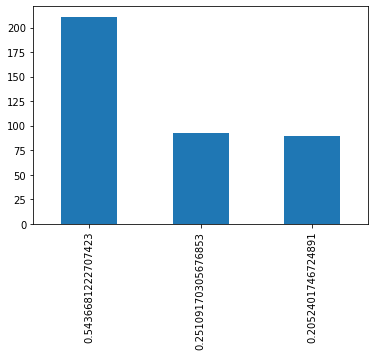

In [12]:
test_t['pclass'].value_counts().plot.bar()

In [14]:
# test_orig = count_enc.inverse_transform(test_t)
test_orig.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,3,male,38.0,0,0,7.8958,n,S
533,2,female,21.0,0,1,21.0000,n,S
459,2,male,42.0,1,0,27.0000,n,S
1150,3,male,NaN,0,0,14.5000,n,S
393,2,male,25.0,0,0,31.5000,n,S


In [15]:
test_orig.isnull().sum()

pclass       0
sex          0
age         88
sibsp        0
parch        0
fare         1
cabin        0
embarked     0
dtype: int64

### Count

Labels are replaced by the number of the observations that show that label in the train set.

In [13]:
# this time we encode only 1 variable

count_enc = ce.CountFrequencyCategoricalEncoder(encoding_method='count',
                                                variables='cabin')

count_enc.fit(X_train)

CountFrequencyCategoricalEncoder(encoding_method='count', variables=['cabin'])

In [14]:
# we can find the mappings in the encoder_dict_ attribute.

count_enc.encoder_dict_

{'cabin': {'n': 702,
  'C': 71,
  'B': 42,
  'D': 32,
  'E': 32,
  'A': 17,
  'F': 15,
  'G': 4,
  'T': 1}}

In [15]:
# transform the data: see the change in the head view for Cabin

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,3,male,38.0,0,0,7.8958,702,S
533,2,female,21.0,0,1,21.0000,702,S
459,2,male,42.0,1,0,27.0000,702,S
1150,3,male,NaN,0,0,14.5000,702,S
393,2,male,25.0,0,0,31.5000,702,S


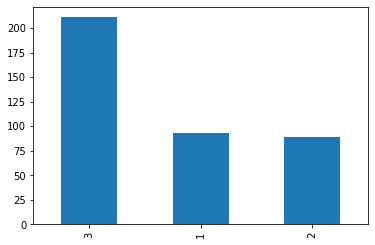

In [16]:
test_t['pclass'].value_counts().plot.bar()

### Select categorical variables automatically

If we don't indicate which variables we want to encode, the encoder will find all categorical variables

In [17]:
# this time we ommit the argument for variable
count_enc = ce.CountFrequencyCategoricalEncoder(encoding_method = 'count')

count_enc.fit(X_train)

CountFrequencyCategoricalEncoder(encoding_method='count',
                                 variables=['pclass', 'sex', 'cabin',
                                            'embarked'])

In [18]:
# we can see that the encoder selected automatically all the categorical variables

count_enc.variables

['pclass', 'sex', 'cabin', 'embarked']

In [19]:
# transform the data: see the change in the head view

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,498,581,38.0,0,0,7.8958,702,652
533,188,335,21.0,0,1,21.0000,702,652
459,188,581,42.0,1,0,27.0000,702,652
1150,498,581,NaN,0,0,14.5000,702,652
393,188,581,25.0,0,0,31.5000,702,652


Note that if there are labels in the test set that were not present in the train set, the transformer will introduce NaN, and raise a warning.

## MeanCategoricalEncoder

The MeanCategoricalEncoder replaces the labels of the variables by the mean value of the target for that label. For example, in the variable colour, if the mean value of the binary target is 0.5 for the label blue, then blue is replaced by 0.5

In [20]:
# we will transform 3 variables
mean_enc = ce.MeanCategoricalEncoder(variables=['cabin', 'pclass', 'embarked'])

# Note: the MeanCategoricalEncoder needs the target to fit
mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['cabin', 'pclass', 'embarked'])

In [21]:
# see the dictionary with the mappings per variable

mean_enc.encoder_dict_

{'cabin': {'A': 0.5294117647058824,
  'B': 0.7619047619047619,
  'C': 0.5633802816901409,
  'D': 0.71875,
  'E': 0.71875,
  'F': 0.6666666666666666,
  'G': 0.5,
  'T': 0.0,
  'n': 0.30484330484330485},
 'pclass': {1: 0.6173913043478261,
  2: 0.43617021276595747,
  3: 0.25903614457831325},
 'embarked': {'C': 0.5580110497237569,
  'Q': 0.37349397590361444,
  'S': 0.3389570552147239}}

In [22]:
mean_enc.variables

['cabin', 'pclass', 'embarked']

In [23]:
# we can see the transformed variables in the head view

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,498,581,38.0,0,0,7.8958,702,652
533,188,335,21.0,0,1,21.0000,702,652
459,188,581,42.0,1,0,27.0000,702,652
1150,498,581,NaN,0,0,14.5000,702,652
393,188,581,25.0,0,0,31.5000,702,652


### Automatically select the variables

This encoder will select all categorical variables to encode, when no variables are specified when calling the encoder

In [24]:
mean_enc = ce.MeanCategoricalEncoder()

mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['pclass', 'sex', 'cabin', 'embarked'])

In [25]:
mean_enc.variables

['pclass', 'sex', 'cabin', 'embarked']

In [26]:
# we can see the transformed variables in the head view

train_t = count_enc.transform(X_train)
test_t = count_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,498,581,38.0,0,0,7.8958,702,652
533,188,335,21.0,0,1,21.0000,702,652
459,188,581,42.0,1,0,27.0000,702,652
1150,498,581,NaN,0,0,14.5000,702,652
393,188,581,25.0,0,0,31.5000,702,652


## WoERatioCategoricalEncoder

This encoder replaces the labels by the weight of evidence or the ratio of probabilities. It only works for binary classification.

    The weight of evidence is given by: np.log( p(1) / p(0) )
    
    The target probability ratio is given by: p(1) / p(0)
    
   
### Weight of evidence

In [27]:
## Rare value encoder first to reduce the cardinality
# see below for more details on this encoder

rare_encoder = ce.RareLabelCategoricalEncoder(
    tol=0.03, n_categories=2, variables=['cabin', 'pclass', 'embarked'])

rare_encoder.fit(X_train)

# transform
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

In [28]:
woe_enc = ce.WoERatioCategoricalEncoder(
    encoding_method='woe', variables=['cabin', 'pclass', 'embarked'])

# to fit you need to pass the target y
woe_enc.fit(train_t, y_train)

WoERatioCategoricalEncoder(encoding_method='woe',
                           variables=['cabin', 'pclass', 'embarked'])

In [29]:
woe_enc.encoder_dict_

{'cabin': {'B': 1.1631508098056806,
  'C': 0.2548922496287902,
  'D': 0.9382696385929302,
  'E': 0.9382696385929302,
  'Rare': 0.2719337154836416,
  'n': -0.8243393908312957},
 'pclass': {1: 0.4784902431230542,
  2: -0.25671984684781396,
  3: -1.0509842396788551},
 'embarked': {'C': 0.23309388216737797,
  'Q': -0.5172565140962812,
  'S': -0.6679453885859952}}

In [30]:
# transform and visualise the data

train_t = woe_enc.transform(train_t)
test_t = woe_enc.transform(test_t)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,-1.050984,male,38.0,0,0,7.8958,-0.824339,-0.667945
533,-0.256720,female,21.0,0,1,21.0000,-0.824339,-0.667945
459,-0.256720,male,42.0,1,0,27.0000,-0.824339,-0.667945
1150,-1.050984,male,NaN,0,0,14.5000,-0.824339,-0.667945
393,-0.256720,male,25.0,0,0,31.5000,-0.824339,-0.667945


### Ratio

Similarly, it is recommended to remove rare labels and high cardinality before using this encoder.

In [31]:
# rare label encoder first: transform

train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

In [32]:
ratio_enc = ce.WoERatioCategoricalEncoder(
    encoding_method='ratio', variables=['cabin', 'pclass', 'embarked'])

# to fit we need to pass the target y
ratio_enc.fit(train_t, y_train)

WoERatioCategoricalEncoder(encoding_method='ratio',
                           variables=['cabin', 'pclass', 'embarked'])

In [33]:
ratio_enc.encoder_dict_

{'cabin': {'B': 3.1999999999999993,
  'C': 1.2903225806451615,
  'D': 2.5555555555555554,
  'E': 2.5555555555555554,
  'Rare': 1.3124999999999998,
  'n': 0.4385245901639344},
 'pclass': {1: 1.6136363636363635,
  2: 0.7735849056603774,
  3: 0.34959349593495936},
 'embarked': {'C': 1.2625000000000002,
  'Q': 0.5961538461538461,
  'S': 0.5127610208816704}}

In [34]:
# transform and visualise the data

train_t = woe_enc.transform(train_t)
test_t = woe_enc.transform(test_t)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,-1.050984,male,38.0,0,0,7.8958,-0.824339,-0.667945
533,-0.256720,female,21.0,0,1,21.0000,-0.824339,-0.667945
459,-0.256720,male,42.0,1,0,27.0000,-0.824339,-0.667945
1150,-1.050984,male,NaN,0,0,14.5000,-0.824339,-0.667945
393,-0.256720,male,25.0,0,0,31.5000,-0.824339,-0.667945


## OrdinalCategoricalEncoder

The OrdinalCategoricalEncoder will replace the variable labels by digits, from 1 to the number of different labels. If we select "arbitrary", then the encoder will assign numbers as the labels appear in the variable (first come first served). If we select "ordered", the encoder will assign numbers following the mean of the target value for that label. So labels for which the mean of the target is higher will get the number 1, and those where the mean of the target is smallest will get the number n.

### Ordered

In [35]:
# we will encode 3 variables:

ordinal_enc = ce.OrdinalCategoricalEncoder(
    encoding_method='ordered', variables=['pclass', 'cabin', 'embarked'])

# for this encoder, we need to pass the target as argument
# if encoding_method='ordered'
ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['pclass', 'cabin', 'embarked'])

In [36]:
# here we can see the mappings
ordinal_enc.encoder_dict_

{'pclass': {3: 0, 2: 1, 1: 2},
 'cabin': {'T': 0,
  'n': 1,
  'G': 2,
  'A': 3,
  'C': 4,
  'F': 5,
  'D': 6,
  'E': 7,
  'B': 8},
 'embarked': {'S': 0, 'Q': 1, 'C': 2}}

In [37]:
# transform and visualise the data

train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,0,male,38.0,0,0,7.8958,1,0
533,1,female,21.0,0,1,21.0000,1,0
459,1,male,42.0,1,0,27.0000,1,0
1150,0,male,NaN,0,0,14.5000,1,0
393,1,male,25.0,0,0,31.5000,1,0


### Arbitrary

In [38]:
ordinal_enc = ce.OrdinalCategoricalEncoder(encoding_method='arbitrary',
                                           variables='cabin')

# for this encoder we don't need to add the target. You can leave it or remove it.
ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(encoding_method='arbitrary', variables=['cabin'])

In [39]:
ordinal_enc.encoder_dict_

{'cabin': {'n': 0,
  'E': 1,
  'C': 2,
  'D': 3,
  'B': 4,
  'A': 5,
  'F': 6,
  'T': 7,
  'G': 8}}

Note that the ordering of the different labels is  not the same when we select "arbitrary" or "ordered"

In [40]:
# transform: see the numerical values in the former categorical variables

train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,3,male,38.0,0,0,7.8958,0,S
533,2,female,21.0,0,1,21.0000,0,S
459,2,male,42.0,1,0,27.0000,0,S
1150,3,male,NaN,0,0,14.5000,0,S
393,2,male,25.0,0,0,31.5000,0,S


### Automatically select categorical variables

These encoder as well selects all the categorical variables, if None is passed to the variable argument when calling the enconder.

In [41]:
ordinal_enc = ce.OrdinalCategoricalEncoder(encoding_method = 'arbitrary')

# for this encoder we don't need to add the target. You can leave it or remove it.
ordinal_enc.fit(X_train)

OrdinalCategoricalEncoder(encoding_method='arbitrary',
                          variables=['pclass', 'sex', 'cabin', 'embarked'])

In [42]:
ordinal_enc.variables

['pclass', 'sex', 'cabin', 'embarked']

In [43]:
# transform: see the numerical values in the former categorical variables

train_t = ordinal_enc.transform(X_train)
test_t = ordinal_enc.transform(X_test)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
1139,1,1,38.0,0,0,7.8958,0,0
533,0,0,21.0,0,1,21.0000,0,0
459,0,1,42.0,1,0,27.0000,0,0
1150,1,1,NaN,0,0,14.5000,0,0
393,0,1,25.0,0,0,31.5000,0,0


## OneHotCategoricalEncoder

Performs One Hot Encoding. The encoder can select how many different labels per variable to encode into binaries. When top_categories is set to None, all the categories will be transformed in binary variables. However, when top_categories is set to an integer, for example 10, then only the 10 most popular categories will be transformed into binary, and the rest will be discarded.

The encoder has also the possibility to create binary variables from all categories (drop_last = False), or remove the binary for the last category (drop_last = True), for use in linear models.

### All binary, no top_categories

In [44]:
ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=None,
    variables=['pclass', 'cabin', 'embarked'],
    drop_last=False)

ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['pclass', 'cabin', 'embarked'])

In [45]:
ohe_enc.drop_last

False

In [46]:
ohe_enc.encoder_dict_

{'pclass': array([2, 3, 1], dtype=object),
 'cabin': array(['n', 'E', 'C', 'D', 'B', 'A', 'F', 'T', 'G'], dtype=object),
 'embarked': array(['S', 'C', 'Q'], dtype=object)}

In [47]:
train_t = ohe_enc.transform(X_train)
test_t = ohe_enc.transform(X_train)

test_t.head()

,sex,age,sibsp,parch,fare,pclass_2,pclass_3,pclass_1,cabin_n,cabin_E,cabin_C,cabin_D,cabin_B,cabin_A,cabin_F,cabin_T,cabin_G,embarked_S,embarked_C,embarked_Q
501,female,13.0,0,1,19.5000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
588,female,4.0,1,1,23.0000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
402,female,30.0,1,0,13.8583,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1193,male,NaN,0,0,7.7250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
686,female,22.0,0,0,7.7250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


### Dropping the last category for linear models

In [48]:
ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=None,
    variables=['pclass', 'cabin', 'embarked'],
    drop_last=True)

ohe_enc.fit(X_train)

ohe_enc.encoder_dict_

{'pclass': [2, 3],
 'cabin': ['n', 'E', 'C', 'D', 'B', 'A', 'F', 'T'],
 'embarked': ['S', 'C']}

In [49]:
train_t = ohe_enc.transform(X_train)
test_t = ohe_enc.transform(X_train)

test_t.head()

,sex,age,sibsp,parch,fare,pclass_2,pclass_3,cabin_n,cabin_E,cabin_C,cabin_D,cabin_B,cabin_A,cabin_F,cabin_T,embarked_S,embarked_C
501,female,13.0,0,1,19.5000,1,0,1,0,0,0,0,0,0,0,1,0
588,female,4.0,1,1,23.0000,1,0,1,0,0,0,0,0,0,0,1,0
402,female,30.0,1,0,13.8583,1,0,1,0,0,0,0,0,0,0,0,1
1193,male,NaN,0,0,7.7250,0,1,1,0,0,0,0,0,0,0,0,0
686,female,22.0,0,0,7.7250,0,1,1,0,0,0,0,0,0,0,0,0


### Selecting top_categories to encode

In [50]:
ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=2,
    variables=['pclass', 'cabin', 'embarked'],
    drop_last=False)

ohe_enc.fit(X_train)

ohe_enc.encoder_dict_

{'pclass': [3, 1], 'cabin': ['n', 'C'], 'embarked': ['S', 'C']}

In [51]:
train_t = ohe_enc.transform(X_train)
test_t = ohe_enc.transform(X_train)

test_t.head()

,sex,age,sibsp,parch,fare,pclass_3,pclass_1,cabin_n,cabin_C,embarked_S,embarked_C
501,female,13.0,0,1,19.5000,0,0,1,0,1,0
588,female,4.0,1,1,23.0000,0,0,1,0,1,0
402,female,30.0,1,0,13.8583,0,0,1,0,0,1
1193,male,NaN,0,0,7.7250,1,0,1,0,0,0
686,female,22.0,0,0,7.7250,1,0,1,0,0,0


## RareLabelCategoricalEncoder

The RareLabelCategoricalEncoder groups labels that show a small number of observations in the dataset into a new category called 'Rare'. This helps to avoid overfitting.

The argument tol indicates the percentage of observations that the label needs to have in order not to be re-grouped into the "Rare" label. The argument n_categories indicates the minimum number of distinct categories that a variable needs to have for any of the labels to be re-grouped into rare. If the number of labels is smaller than n_categories, then the encoder will not group the labels for that variable.

In [52]:
## Rare value encoder

rare_encoder = ce.RareLabelCategoricalEncoder(
    tol=0.03, n_categories=5, variables=['cabin', 'pclass', 'embarked'])


rare_encoder.fit(X_train)

# the encoder_dict_ contains a dictionary of the {variable: frequent labels} pair
rare_encoder.encoder_dict_

c:\users\sole\documents\repositories\feature_engine\feature_engine\categorical_encoders.py:667: UserWarning: The number of unique categories for variable pclass is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
c:\users\sole\documents\repositories\feature_engine\feature_engine\categorical_encoders.py:667: UserWarning: The number of unique categories for variable embarked is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "


{'cabin': Index(['n', 'C', 'B', 'D', 'E'], dtype='object'),
 'pclass': array([2, 3, 1], dtype=object),
 'embarked': array(['S', 'C', 'Q'], dtype=object)}

In [53]:
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_train)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
501,2,female,13.0,0,1,19.5000,n,S
588,2,female,4.0,1,1,23.0000,n,S
402,2,female,30.0,1,0,13.8583,n,C
1193,3,male,NaN,0,0,7.7250,n,Q
686,3,female,22.0,0,0,7.7250,n,Q


### Automatically select all categorical variables

If no variable list is passed as argument, it selects all the categorical variables.

In [54]:
## Rare value encoder

rare_encoder = ce.RareLabelCategoricalEncoder(tol = 0.03, n_categories=5)

rare_encoder.fit(X_train)

rare_encoder.encoder_dict_

c:\users\sole\documents\repositories\feature_engine\feature_engine\categorical_encoders.py:667: UserWarning: The number of unique categories for variable pclass is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
c:\users\sole\documents\repositories\feature_engine\feature_engine\categorical_encoders.py:667: UserWarning: The number of unique categories for variable sex is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique categories for variable {} is less than that indicated in "
c:\users\sole\documents\repositories\feature_engine\feature_engine\categorical_encoders.py:667: UserWarning: The number of unique categories for variable embarked is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn("The number of unique ca

{'pclass': array([2, 3, 1], dtype=object),
 'sex': array(['female', 'male'], dtype=object),
 'cabin': Index(['n', 'C', 'B', 'D', 'E'], dtype='object'),
 'embarked': array(['S', 'C', 'Q'], dtype=object)}

In [55]:
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_train)

test_t.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
501,2,female,13.0,0,1,19.5000,n,S
588,2,female,4.0,1,1,23.0000,n,S
402,2,female,30.0,1,0,13.8583,n,C
1193,3,male,NaN,0,0,7.7250,n,Q
686,3,female,22.0,0,0,7.7250,n,Q
